In [12]:
!python -V

Python 3.9.12


In [13]:
!pip install pyarrow

In [14]:
import pandas as pd

In [15]:
import pickle

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [122]:
jan2021_data_path = '~/data/fhv_tripdata_2021-01.parquet'
feb2021_data_path = '~/data/fhv_tripdata_2021-02.parquet'

df = pd.read_parquet(jan2021_data_path)
df

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037
...,...,...,...,...,...,...,...
1154107,B03266,2021-01-31 23:43:03,2021-01-31 23:51:48,7.0,7.0,None,B03266
1154108,B03284,2021-01-31 23:50:27,2021-02-01 00:48:03,44.0,91.0,None,
1154109,B03285,2021-01-31 23:13:46,2021-01-31 23:29:58,171.0,171.0,None,B03285
1154110,B03285,2021-01-31 23:58:03,2021-02-01 00:17:29,15.0,15.0,None,B03285


In [123]:
# Question 1: How many records in January 2021 dataset?

total_records = df.shape[0]
total_records

1154112

In [124]:
df['duration'] = df.dropOff_datetime - df.pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

In [125]:
df.duration.describe()

count    1.154112e+06
mean     1.916722e+01
std      3.986922e+02
min      1.666667e-02
25%      7.766667e+00
50%      1.340000e+01
75%      2.228333e+01
max      4.233710e+05
Name: duration, dtype: float64

In [126]:
# Question 2: Average duration
df['duration'].mean()

19.1672240937939

/home/ubuntu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

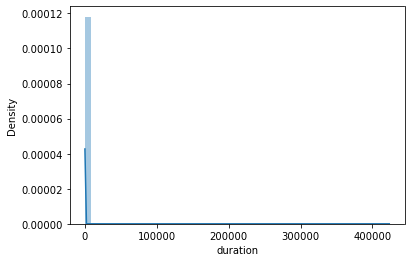

In [127]:
# Check distribution of duration variable
sns.distplot(df.duration)

In [128]:
df.duration.describe(percentiles=[0.95, 0.98, 0.99])

count    1.154112e+06
mean     1.916722e+01
std      3.986922e+02
min      1.666667e-02
50%      1.340000e+01
95%      4.725000e+01
98%      6.613333e+01
99%      9.030000e+01
max      4.233710e+05
Name: duration, dtype: float64

In [129]:
df = df[(df.duration >= 1) & (df.duration <= 60)]

/home/ubuntu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

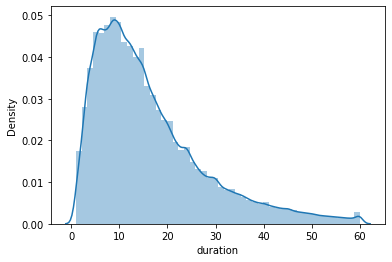

In [130]:
sns.distplot(df.duration)

In [131]:
df.duration.describe()

count    1.109826e+06
mean     1.624725e+01
std      1.155150e+01
min      1.000000e+00
25%      7.850000e+00
50%      1.323333e+01
75%      2.146667e+01
max      6.000000e+01
Name: duration, dtype: float64

In [132]:
df.duration.describe(percentiles=[0.95, 0.98, 0.99])

count    1.109826e+06
mean     1.624725e+01
std      1.155150e+01
min      1.000000e+00
50%      1.323333e+01
95%      4.070000e+01
98%      4.936667e+01
99%      5.423333e+01
max      6.000000e+01
Name: duration, dtype: float64

In [133]:
records_dropped = total_records - df.shape[0]
records_dropped

44286

In [134]:
df['PUlocationID'] = df['PUlocationID'].fillna("-1")
df['DOlocationID'] = df['DOlocationID'].fillna("-1")
df

/tmp/ipykernel_1772/3865939186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PUlocationID'] = df['PUlocationID'].fillna("-1")
/tmp/ipykernel_1772/3865939186.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DOlocationID'] = df['DOlocationID'].fillna("-1")


,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,-1,-1,None,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,-1,-1,None,B00009,17.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,-1,72.0,None,B00037,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,-1,61.0,None,B00037,15.216667
5,B00037,2021-01-01 00:59:02,2021-01-01 01:08:05,-1,71.0,None,B00037,9.050000
...,...,...,...,...,...,...,...,...
1154107,B03266,2021-01-31 23:43:03,2021-01-31 23:51:48,7.0,7.0,None,B03266,8.750000
1154108,B03284,2021-01-31 23:50:27,2021-02-01 00:48:03,44.0,91.0,None,,57.600000
1154109,B03285,2021-01-31 23:13:46,2021-01-31 23:29:58,171.0,171.0,None,B03285,16.200000
1154110,B03285,2021-01-31 23:58:03,2021-02-01 00:17:29,15.0,15.0,None,B03285,19.433333


In [141]:
# Question 3: Percentage of missing values for the pickup location ID

(df[df['PUlocationID'] == "-1"].shape[0] / df.shape[0]) * 100

83.52732770722618

In [142]:
categorical = ['PUlocationID', 'DOlocationID']
df[categorical] = df[categorical].astype(str)

/tmp/ipykernel_1772/3083589170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical] = df[categorical].astype(str)


In [146]:
# Sanity check the conversion of the categorical variables
df[categorical].dtypes

PUlocationID    object
DOlocationID    object
dtype: object

In [149]:
train_dicts = df[categorical].to_dict(orient='records')
train_dicts[1:10]

[{'PUlocationID': '-1', 'DOlocationID': '-1'},
 {'PUlocationID': '-1', 'DOlocationID': '72.0'},
 {'PUlocationID': '-1', 'DOlocationID': '61.0'},
 {'PUlocationID': '-1', 'DOlocationID': '71.0'},
 {'PUlocationID': '-1', 'DOlocationID': '91.0'},
 {'PUlocationID': '-1', 'DOlocationID': '39.0'},
 {'PUlocationID': '-1', 'DOlocationID': '37.0'},
 {'PUlocationID': '-1', 'DOlocationID': '39.0'},
 {'PUlocationID': '-1', 'DOlocationID': '72.0'}]

In [150]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [151]:
X_train

<1109826x525 sparse matrix of type '<class 'numpy.float64'>'
	with 2219652 stored elements in Compressed Sparse Row format>

In [153]:
# Question 4: Dimensionality of feature matrix? (The number of columns).

X_train.shape[1]

525

In [154]:
# Train a plain linear regression model with default parameters

target = 'duration'
y_train = df[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

/home/ubuntu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


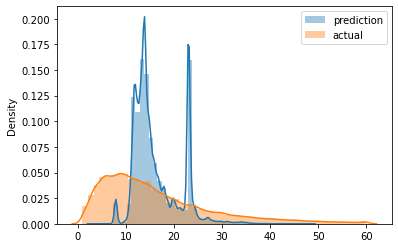

In [155]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [156]:
# Question 5: Calculate the RMSE of the model on the training data
mean_squared_error(y_train, y_pred, squared=False)

10.5285191072072

In [179]:
# Now let's apply this model to the validation dataset (Feb 2021). Same as before, load the dataset, derive the duration,
# filter outliers, fill na's with "-1" and transform categorical values to str

df_val = pd.read_parquet(feb2021_data_path)
df_val['duration'] = df_val.dropOff_datetime - df_val.pickup_datetime
df_val.duration = df_val.duration.apply(lambda td: td.total_seconds() / 60)
df_val = df_val[(df_val.duration >= 1) & (df_val.duration <= 60)]
df_val['PUlocationID'] = df_val['PUlocationID'].fillna("-1")
df_val['DOlocationID'] = df_val['DOlocationID'].fillna("-1")
categorical = ['PUlocationID', 'DOlocationID']
df_val[categorical] = df_val[categorical].astype(str)

In [180]:
val_dicts = df_val[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)
val_dicts[1:10]

[{'PUlocationID': '173.0', 'DOlocationID': '56.0'},
 {'PUlocationID': '82.0', 'DOlocationID': '129.0'},
 {'PUlocationID': '-1', 'DOlocationID': '225.0'},
 {'PUlocationID': '-1', 'DOlocationID': '61.0'},
 {'PUlocationID': '-1', 'DOlocationID': '26.0'},
 {'PUlocationID': '-1', 'DOlocationID': '72.0'},
 {'PUlocationID': '-1', 'DOlocationID': '169.0'},
 {'PUlocationID': '-1', 'DOlocationID': '161.0'},
 {'PUlocationID': '13.0', 'DOlocationID': '182.0'}]

In [181]:
y_val = df_val[target].values
y_pred_val = lr.predict(X_val)

/home/ubuntu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


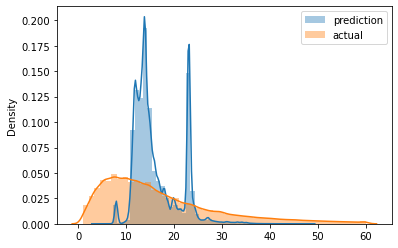

In [182]:
sns.distplot(y_pred_val, label='prediction')
sns.distplot(y_val, label='actual')

plt.legend()

In [183]:
# Question 6: RMSE on validation dataset

mean_squared_error(y_val, y_pred_val, squared=False)

11.014283163400654